# Test experimental model

This notebook tests the model used for experimental cells runs correctly on a simple step stimulus.

In [15]:
import json
import sys
import os
import time
import neuron
from pathlib import Path
import time

import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import numpy as np

import shutil
from pprint import pprint

import multimodalfitting as mf

import neuroplotlib as nplt

%matplotlib notebook 
#notebook

In [16]:
model_name = "experimental" # "hay", "hay_ais", "hay_ais_hillock"
probe_type = "planar"
base_folder = Path("../..")
cell_models_folder = base_folder / "cell_models"

model_folder = cell_models_folder / f"{model_name}_model"
# data_folder = Path("/gpfs/bbp.cscs.ch/home/mandge/lfpy/multimodalfitting/data/cell1_210301") 
data_folder = base_folder / "data_210916" / "experimental" / "cell1_210301"

In [17]:
morphology = cell_models_folder / f"{model_name}_model" / "morphology_corrected.swc" #data_folder / "morphology" / "morphology_corrected.swc"
probe_file = data_folder / "extracellular" / "probe.json"
params_release = "experimental_model/parameters_abd_release.json"

In [18]:
cell = mf.create_experimental_model(morphology_file=morphology,
                                    cell_model_folder=model_folder,
                                    release=True,
                                    v_init=-70, 
                                    abd=False, model_type="neuron")
cell_abd = mf.create_experimental_model(morphology_file=morphology,
                                    cell_model_folder=model_folder,
                                    release=True,
                                    v_init=-70, 
                                    abd=True, model_type="neuron")

Setting v_init to -70
Setting v_init to -70


In [19]:
cell_lfpy = mf.create_experimental_model(morphology_file=morphology,
                                         cell_model_folder=model_folder,
                                         release=True,
                                         v_init=-70, 
                                         abd=False, model_type="LFPy")
cell_lfpy_abd = mf.create_experimental_model(morphology_file=morphology,
                                             cell_model_folder=model_folder,
                                             release=True,
                                             v_init=-70, 
                                             abd=True, model_type="LFPy")

Setting v_init to -70
Setting v_init to -70


In [20]:
def plot_cell_neuron(cell, sim, color="k", ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()
    
    cell.freeze({})
    cell.instantiate(sim)
    
    for sec in sim.neuron.h.allsec():
        n3d = sec.n3d()

        x = [sec.x3d(i) for i in range(n3d)]
        y = [sec.y3d(i) for i in range(n3d)]
        
        ax.plot(x, y, color=color)

    ax.axis("equal")
    cell.unfreeze({})
    cell.destroy(sim)
    
    return ax

In [21]:
# define a probe (this can also be defined externally)
probe = mf.define_electrode(probe_file=probe_file)

# define a test protocol
protocols = mf.define_test_step_protocol(step_amplitude=0.5, tot_duration=500, step_duration=400, probe=probe)

# instantiate simulator
sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe, mechs_folders=model_folder)
sim_abd = ephys.simulators.LFPySimulator(cell_abd, cvode_active=True, electrode=probe, mechs_folders=model_folder)

<IPython.core.display.Javascript object>


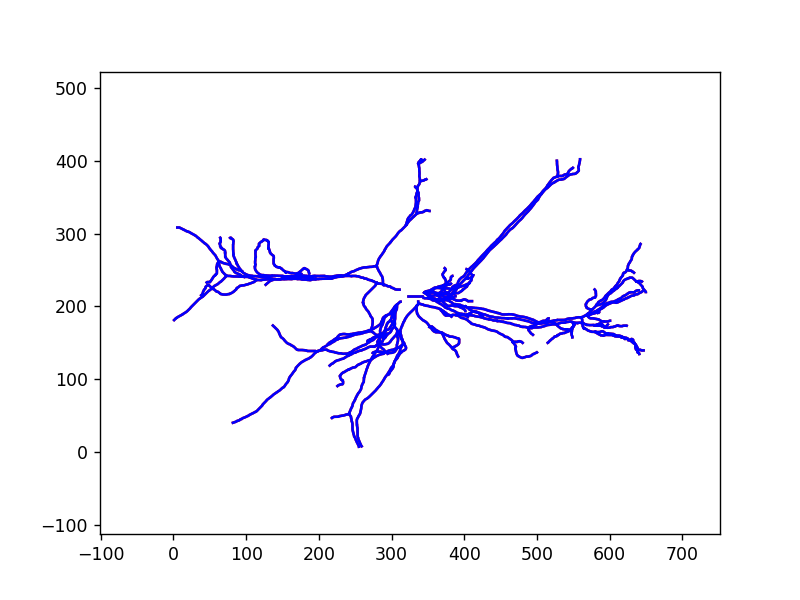

experimental[0].dend[1]
experimental[0].dend[0]
Adding ABD sections
0 experimental[0].dend[0] is now experimental[0].abd[0]
Parent: Connecting experimental[0].abd[0] 0.0 to experimental[0].soma[0]0.5
Children
Connecting experimental[0].abd[0]1.0 to experimental[0].dend[29]0.0
Connecting experimental[0].abd[0]1.0 to experimental[0].dend[1]0.0
1 experimental[0].dend[1] is now experimental[0].abd[1]
Parent: Connecting experimental[0].abd[1] 0.0 to experimental[0].abd[0]1.0
Children
Connecting experimental[0].abd[1]1.0 to experimental[0].ais[0]0.0
Connecting experimental[0].abd[1]1.0 to experimental[0].dend[2]0.0
Added section experimental[0].abd[0]
Start 310.964599609375,223.066162109375 --  End 289.3557434082031,229.59384155273438
Added section experimental[0].abd[1]
Start 289.3557434082031,229.59384155273438 --  End 280.0144348144531,232.18238830566406


In [22]:
ax_noabd = plot_cell_neuron(cell, sim, color="r")
ax_abd = plot_cell_neuron(cell_abd, sim, color="b", ax=ax_noabd)

<IPython.core.display.Javascript object>


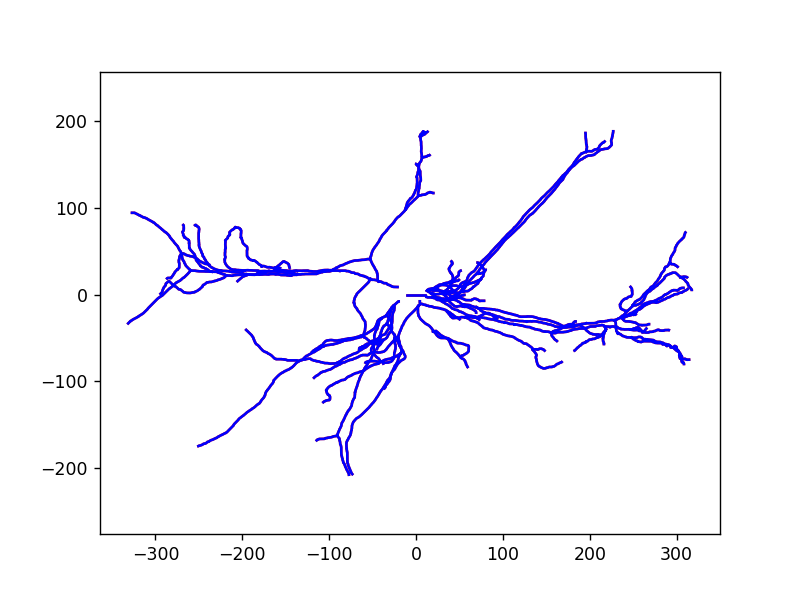

Defining shape!
experimental[0].dend[1]
experimental[0].dend[0]
Adding ABD sections
0 experimental[0].dend[0] is now experimental[0].abd[0]
Parent: Connecting experimental[0].abd[0] 0.0 to experimental[0].soma[0]0.5
Children
Connecting experimental[0].abd[0]1.0 to experimental[0].dend[29]0.0
Connecting experimental[0].abd[0]1.0 to experimental[0].dend[1]0.0
1 experimental[0].dend[1] is now experimental[0].abd[1]
Parent: Connecting experimental[0].abd[1] 0.0 to experimental[0].abd[0]1.0
Children
Connecting experimental[0].abd[1]1.0 to experimental[0].ais[0]0.0
Connecting experimental[0].abd[1]1.0 to experimental[0].dend[2]0.0
Added section experimental[0].abd[0]
Start 310.964599609375,223.066162109375 --  End 289.3557434082031,229.59384155273438
Added section experimental[0].abd[1]
Start 289.3557434082031,229.59384155273438 --  End 280.0144348144531,232.18238830566406
Defining shape!


In [24]:
ax_l_noabd = plot_cell_neuron(cell_lfpy, sim, color="r")
ax_l_abd = plot_cell_neuron(cell_lfpy_abd, sim, color="b", ax=ax_l_noabd)

In [ ]:
cell = cell_lfpy_abd

In [ ]:
print("abd")
cell.freeze({})
cell.instantiate(sim)

In [ ]:
for i, sec in enumerate(cell.LFPyCell.allseclist):
    print(sec.name())
    print('lfpy', cell.LFPyCell.x3d[i][0], cell.LFPyCell.x3d[i][-1])
    n3d = sec.n3d()
    print('neuron', sec.x3d(0), sec.x3d(n3d - 1))    

In [ ]:
cell.unfreeze({})
cell.destroy(sim)

In [ ]:
sec0 = cell_lfpy.icell.dend[0]
sec1 = cell_lfpy.icell.dend[1]

In [ ]:
cell_lfpy.LFPyCell.get_closest_idx(-50, 13, 0)

In [ ]:
cell_lfpy.LFPyCell.get_idx_name(1)

In [ ]:
cell_lfpy.LFPyCell.x3d[1]

In [ ]:
sec = cell_lfpy.icell.axon[0]

In [ ]:
for i in range(sec0.n3d()):
    print(sec0.x3d(i))

In [ ]:
cell_abd.unfreeze({})
cell_abd.destroy(sim)

## Check ABD section

In [ ]:
from multimodalfitting.imaging_tools.correct_swc import swc_dtype

In [ ]:
swc_data = np.loadtxt(morphology, dtype=swc_dtype)

In [ ]:
x_c = swc_data["x"] - swc_data["x"][0]
y_c = swc_data["y"] - swc_data["y"][0]

In [ ]:
print("No abd")
cell.freeze({})
cell.instantiate(sim)

In [ ]:
sim.neuron.h.topology()

In [ ]:
ax = nplt.plot_neuron(cell.LFPyCell, plane="xy", color_ais="g", color_axon="r", 
                      color_abd="b", color_soma="k") #exclude_sections=["soma"])

In [ ]:
ax.plot(x_c, y_c, ls="", marker=".", color='r')

In [ ]:
sec_to_show = ["[0].dend[29]", "[0].dend[2]", "[0].dend[0]", "[0].dend[1]",
               "[0].abd"]

for sec in cell.LFPyCell.allseclist:
    name = sec.name()
    if any([sec_ in name for sec_ in sec_to_show]):
        n3d = sec.n3d()
        print(f"{name} - pos0: {[sec.x3d(0), sec.y3d(0)]}, pos0: {[sec.x3d(n3d - 1), sec.y3d(n3d - 1)]}")
        print(sim.neuron.h.parent_connection(sec), sim.neuron.h.parent_section(sec))

In [ ]:
sec_to_show = ["[0].dend[29]", "[0].dend[2]", "[0].dend[0]", "[0].dend[1]",
               "[0].abd"]

for sec in sim.neuron.h.allsec():
    name = sec.name()
    if any([sec_ in name for sec_ in sec_to_show]):
        n3d = sec.n3d()
        print(f"{name} - pos0: {[sec.x3d(0), sec.y3d(0)]}, pos0: {[sec.x3d(n3d - 1), sec.y3d(n3d - 1)]}")
        print(sim.neuron.h.parent_connection(sec), sim.neuron.h.parent_section(sec))

In [ ]:
cell.unfreeze({})
cell.destroy(sim)

In [ ]:
print("abd")
cell_abd.freeze({})
cell_abd.instantiate(sim)

In [ ]:
ax = nplt.plot_neuron(cell_abd.LFPyCell, plane="xy", color_ais="g", color_abd="b", color_soma="k",color_axon="r", #exclude_sections=["soma"],
                      detailed=True)

In [ ]:
ax.plot(x_c, y_c, ls="", marker=".", color='r')
plt.show()

In [ ]:
sec_to_show = ["[0].dend[29]", "[0].dend[2]", "[0].dend[0]", "[0].dend[1]",
               "[0].abd", ]

for sec in cell_abd.LFPyCell.allseclist:
    name = sec.name()
    if any([sec_ in name for sec_ in sec_to_show]):
        n3d = sec.n3d()
        print(f"{name} - pos0: {[sec.x3d(0), sec.y3d(0)]}, pos0: {[sec.x3d(n3d - 1), sec.y3d(n3d - 1)]}")
        

In [ ]:
experimental[0].dend[0] - pos0: [-21.308685302734375, 8.741073608398438], pos0: [-42.91754150390625, 15.268753051757812]
0.0 0.0

experimental[0].abd[0] - pos0: [-21.608856201171875, 6.527679443359375], pos0: [-30.950164794921875, 9.116226196289062]
experimental[0].dend[1] - pos0: [-42.91754150390625, 15.268753051757812], pos0: [-52.25885009765625, 17.8572998046875]
0.0 0.0



experimental[0].dend[2] - pos0: [-52.25885009765625, 17.8572998046875], pos0: [-136.44325256347656, 23.484603881835938]
0.0 0.0
experimental[0].dend[29] - pos0: [-42.91754150390625, 15.268753051757812], pos0: [-53.046661376953125, 41.154327392578125]
0.0 0.0

In [ ]:
cell_abd.unfreeze({})
cell_abd.destroy(sim)

In [ ]:
# from neuron import h, gui

# import matplotlib.pyplot as plt
# import neuroplotlib as nplt

# %matplotlib inline 


In [ ]:
# # https://neuronsimulator.github.io/nrn/rxd-tutorials/initialization.html
# h.load_file('stdrun.hoc')
# h.load_file('import3d.hoc')

# # load the morphology and instantiate at the top level (i.e. not in a class)
# cell = h.Import3d_SWC_read()
# cell.input('../../cell_models/experimental_model/morphology_corrected.swc')

# h.Import3d_GUI(cell, 0)
# i3d = h.Import3d_GUI(cell, 0)
# i3d.instantiate(None) # pass in a class to instantiate inside the class instead


In [ ]:
# h.topology()

In [ ]:
# for sec in h.allsec():
# #     print(sec)
#     if "apic" in str(sec):
#         h.psection(sec=sec)
#         sref = h.SectionRef(sec=sec)
#         print(sref.nchild())
#         for child in sref.child:
#             print(child.hname())
#     if "dend[1]" in str(sec):
#         h.psection(sec=sec)
#         print(sref.nchild())
#         for child in sref.child:
#             print(child.hname())
            
#     if "dend[0]" in str(sec):
#         h.psection(sec=sec)
#         print(sref.nchild())
#         for child in sref.child:
#             print(child.hname())
    
#     if "axon" in str(sec):
#         h.psection(sec=sec)
#         print(sref.nchild())
#         for child in sref.child:
#             print(child.hname())

In [ ]:
# h.psection(sec=cell.apic[0])
# cell.apic[0].psection()
# type(cell)

In [ ]:
# sref = h.SectionRef(sec=cell.apic[0])
# serf.has_parent()

In [ ]:
# import LFPy
# lfpy_cell = LFPy.Cell(morphology='../../cell_models/experimental_model/morphology_corrected.swc', pt3d=True, delete_sections=True)
# ax = nplt.plot_neuron(lfpy_cell, plane="xy", color_apic="g", color_axon="b",
#                       detailed=True)

In [ ]:
# test = h.Section(name='test')

In [ ]:
# type(test)